##Dry Bean Classification Project

##Done By: Ashwath Bala S

Table of Contents

1.Problem Statement

2.Data Dictionary

3.Loading the Required Libraries

4.Loading the Dataset

5.Exploratory Data Analysis

6.Missing Value Treatment

7.Outlier Treatment

8.Model Building and Evaluation Metrics [Logistic Regression Model with L2 Regularization (Ridge Regularization), Random Forest (A Bagging Model), AdaBoost (A Boosting Model)]

9.Model Stacking

10.Hyper-Parameter Tuning

11.Stacked Model with the best Tuned Parameters

12.Analyzing Feature Importance of Different Models


##1. Problem Statement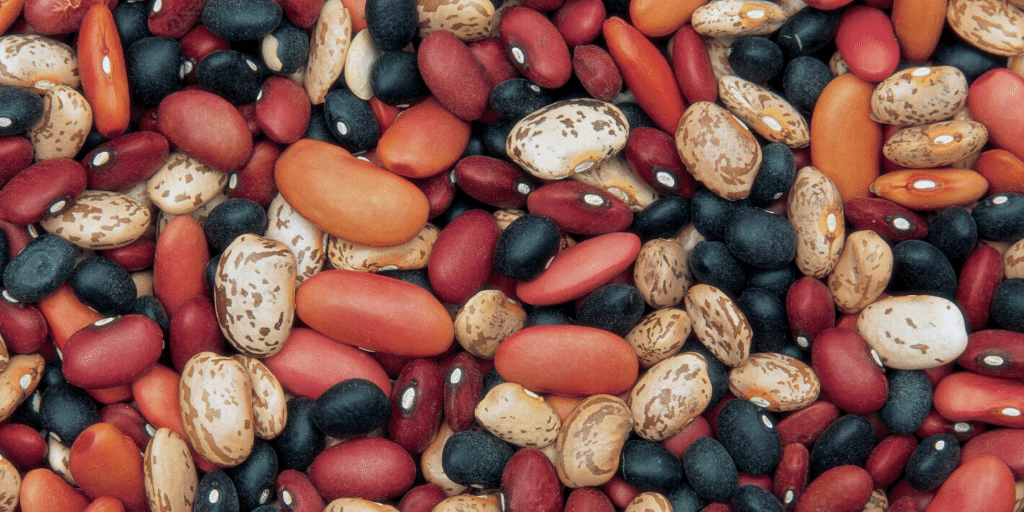


The goal of this project is to predict the type of bean using various features of the bean. This is a multi-class classification problem.

##2. Data Dictionary

Area: The area of the bean.

Perimeter: The perimeter of the bean.

MajorAxisLength: The length of the major axis of the bean.

MinorAxisLength: The length of the minor axis of the bean.

AspectRation: The ratio of the major axis length to the minor axis length.

Eccentricity: A measure of the bean's deviation from being circular.

ConvexArea: The area of the convex hull of the bean.

EquivDiameter: The diameter of a circle with the same area as the bean.

Extent: The ratio of the bean area to the bounding box area.

Solidity: The ratio of the bean area to the convex hull area.

Roundness: A measure of how circular the bean is.

Compactness: A measure of the compactness of the bean.

ShapeFactor1: Shape factor 1, a derived feature related to the shape.

ShapeFactor2: Shape factor 2, a derived feature related to the shape.

ShapeFactor3: Shape factor 3, a derived feature related to the shape.

ShapeFactor4: Shape factor 4, a derived feature related to the shape.

Class: The class label of the bean (target variable).

##3. Loading the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

##4. Loading the Dataset

In [2]:
# Loading the dataset
df = pd.read_csv('Dry_Bean_Classification.csv')

##5. Exploratory Data Analysis

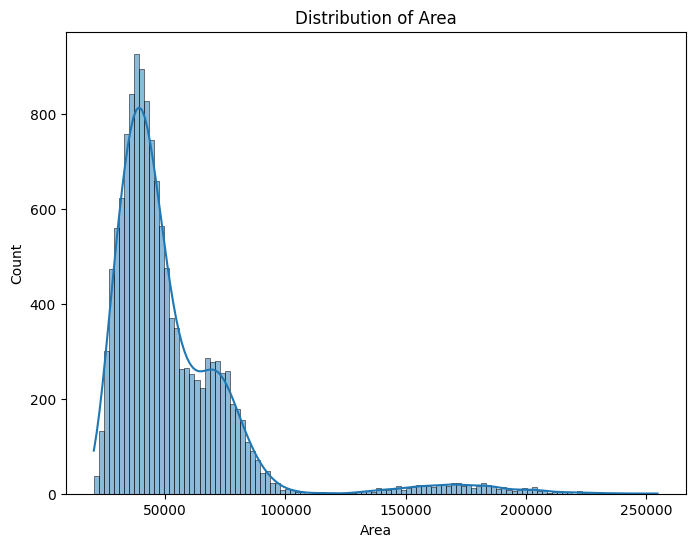

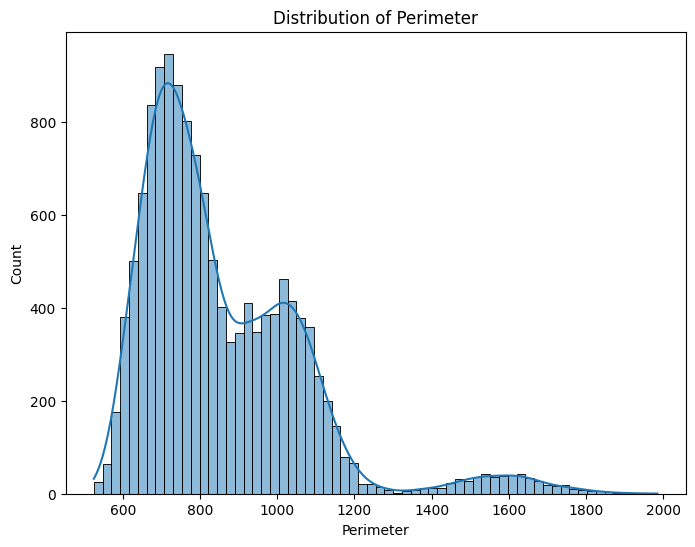

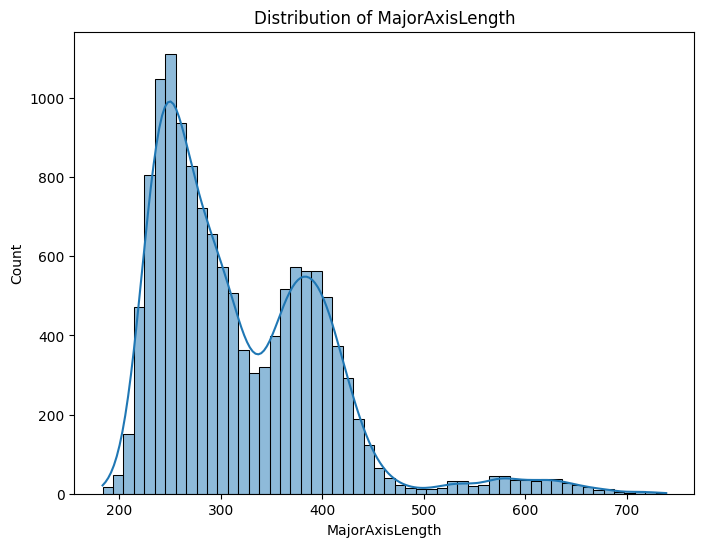

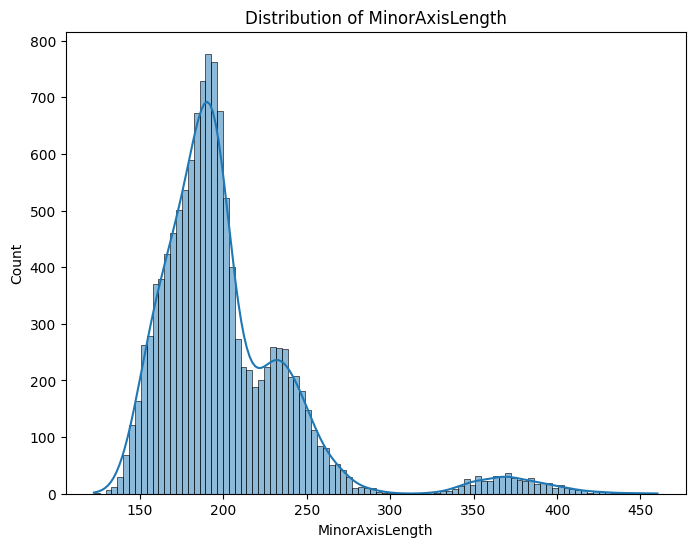

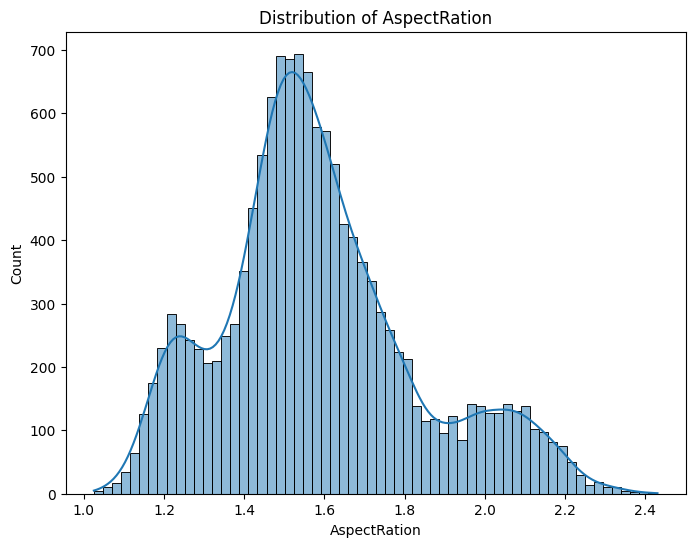

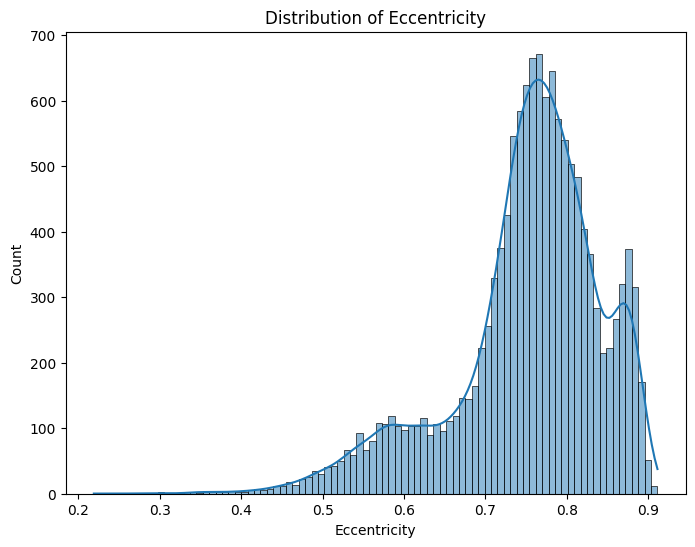

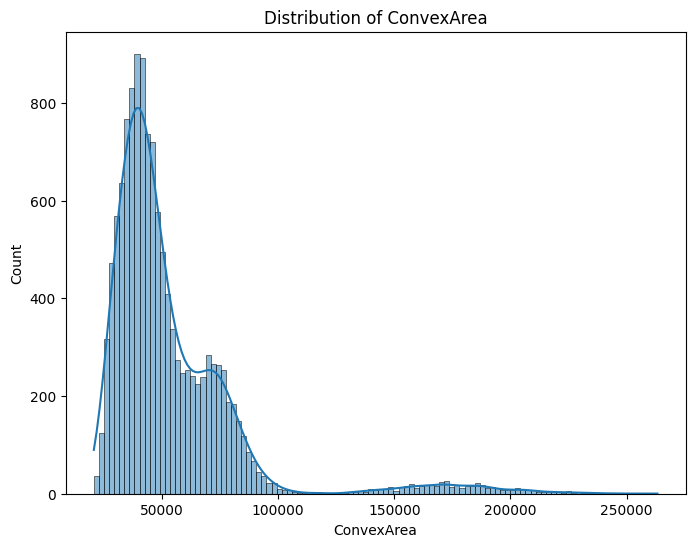

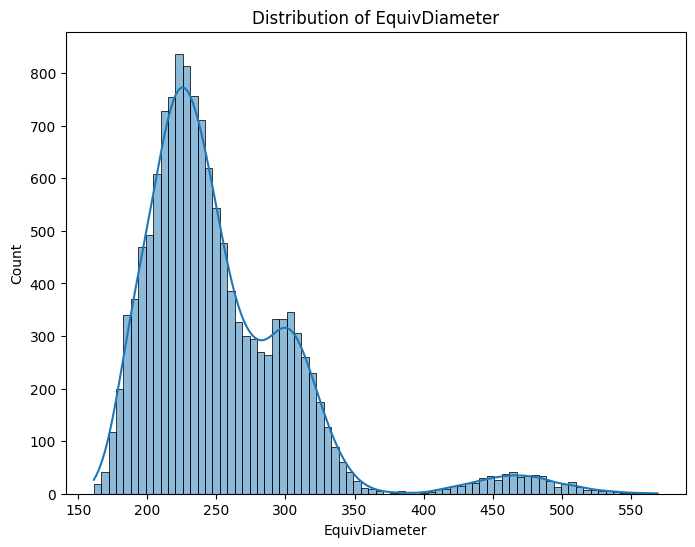

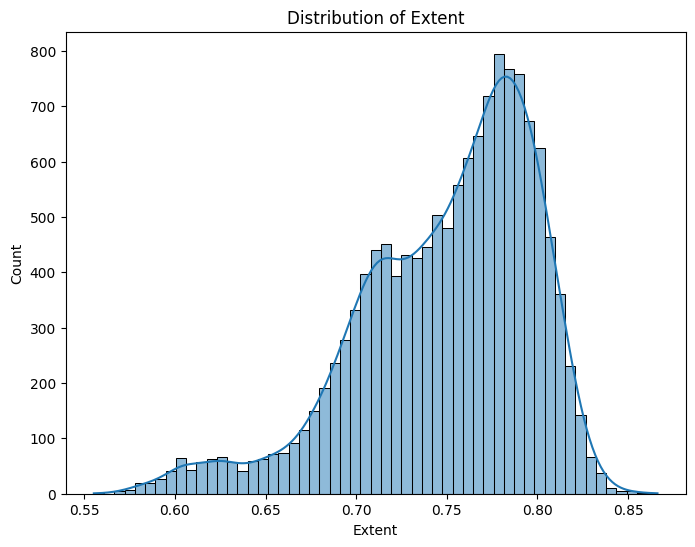

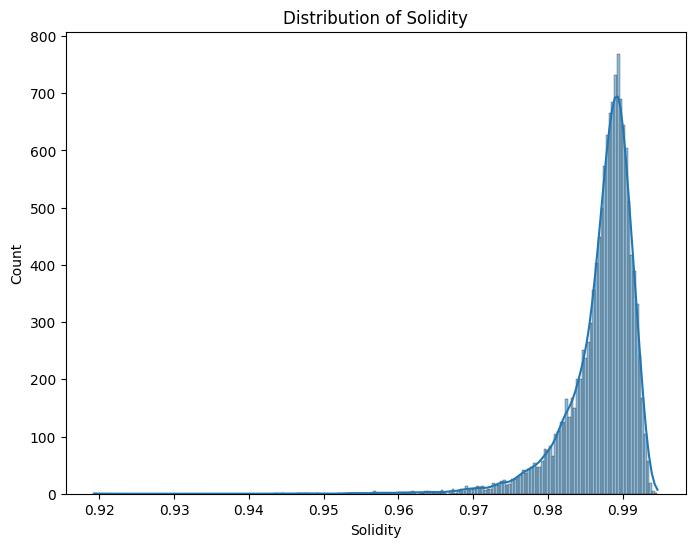

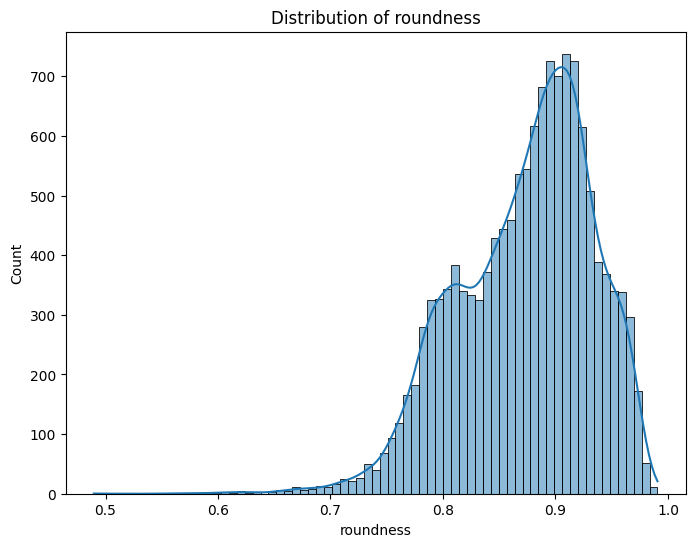

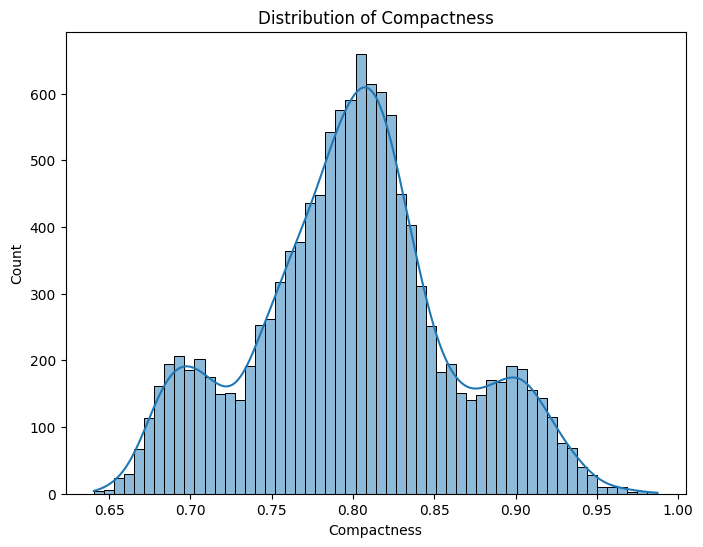

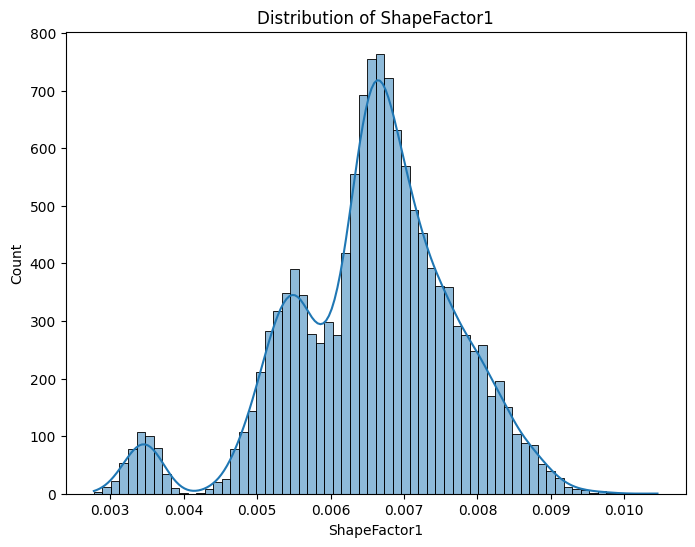

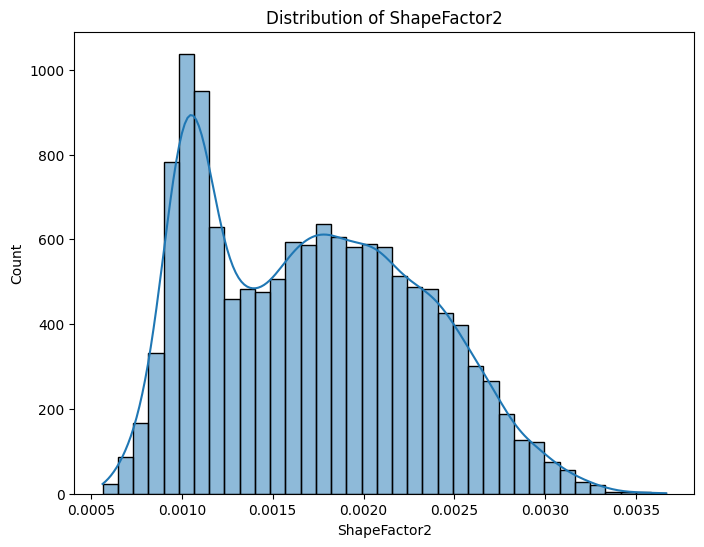

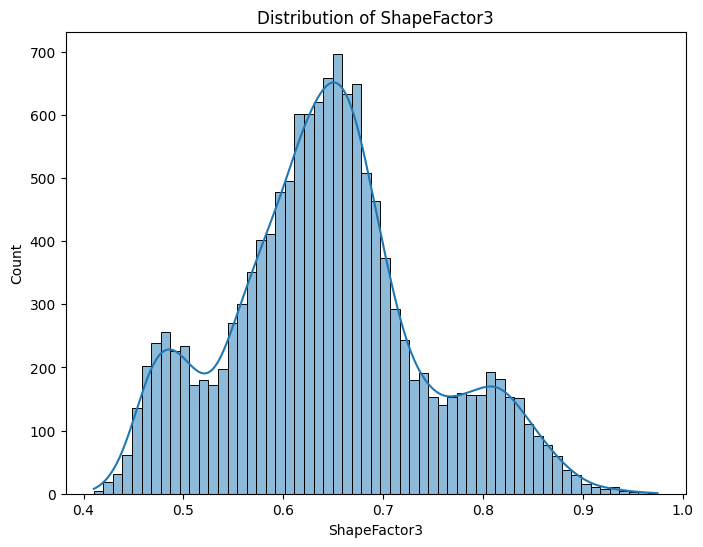

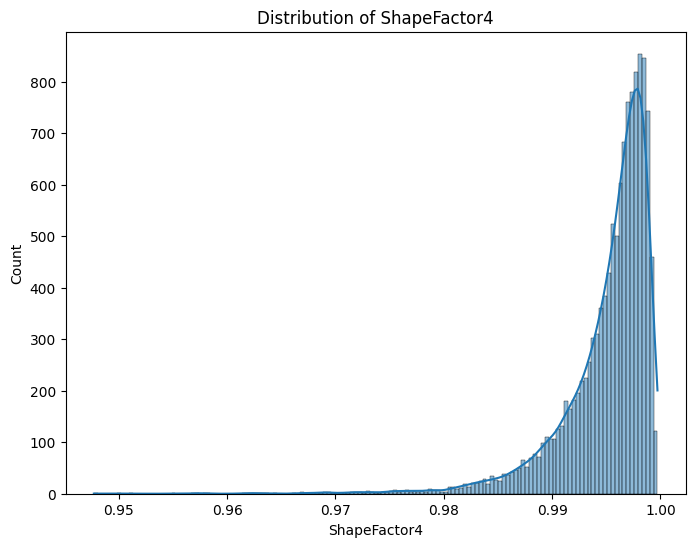

<Figure size 640x480 with 0 Axes>

In [3]:
# Visualizing the distribution of variables
numerical_cols = df.select_dtypes(include=['int64','float64'])
for col in numerical_cols.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
plt.tight_layout()

In [4]:
# Conclusion: -

# 1. Distribution of Area is higher at 4000, indicating significant portion of data falls under the specified value.
# 2. Distribution of Perimeter is higher at 700, indicating significant portion of data falls under the specified value.
# 3. Distribution of MajorAxisLength is higher at 250, indicating significant portion of data falls under the specified value.
# 4. Distribution of MinorAxisLength is higher at 180, indicating significant portion of data falls under the specified value.
# 5. Distribution of AspectRation is higher at 1.5, indicating significant portion of data falls under the specified value.
# 6. Distribution of Eccentricity is higher at 0.75, indicating significant portion of data falls under the specified value.
# 7. Distribution of ConvexArea is higher at 4000, indicating significant portion of data falls under the specified value.
# 8. Distribution of EquivDiameter is higher at 220, indicating significant portion of data falls under the specified value.
# 9. Distribution of Extent is higher at 0.55, indicating significant portion of data falls under the specified value.
# 10. Distribution of Solidity is higher at 0.9, indicating significant portion of data falls under the specified value.
# 11. Distribution of roundness is higher at 0.9, indicating significant portion of data falls under the specified value.
# 12. Distribution of Compactness is higher at 0.8, indicating significant portion of data falls under the specified value.
# 13. Distribution of ShapeFactor1 is higher at 0.65, indicating significant portion of data falls under the specified value.
# 14. Distribution of ShapeFactor2 is higher at 0.0010, indicating significant portion of data falls under the specified value.
# 15. Distribution of ShapeFactor3 is higher at 0.65, indicating significant portion of data falls under the specified value.
# 16. Distribution of ShapeFactor4 is higher at 1.00, indicating significant portion of data falls under the specified value.

In [5]:
# Minimum and Maximum of all numerical variables:

num = df.select_dtypes(include = ['int','float'])
for col in num:
    print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",df[col].min(), ", ",df[col].max(),"]"))

range of Area: [20420, 254616]
range of Perimeter: [524.736, 1985.37]
range of MajorAxisLength: [183.6011650038393, 738.8601534818813]
range of MinorAxisLength: [122.51265345074418, 460.1984968278401]
range of AspectRation: [1.024867596066768, 2.430306446836626]
range of Eccentricity: [0.218951263353565, 0.9114229684680052]
range of ConvexArea: [20684.0, 263261.0]
range of EquivDiameter: [161.24376423134018, 569.3743583287609]
range of Extent: [0.55531471681117, 0.8661946405648266]
range of Solidity: [0.9192461570857022, 0.9946774999456888]
range of roundness: [0.4896182562412148, 0.9906853996160324]
range of Compactness: [0.6405767589768725, 0.9873029693778108]
range of ShapeFactor1: [0.0027780126683855, 0.0104511693243786]
range of ShapeFactor2: [0.0005641690180332, 0.0036649719644516]
range of ShapeFactor3: [0.4103385841413142, 0.9747671533422432]
range of ShapeFactor4: [0.9476874027098624, 0.9997325300471388]


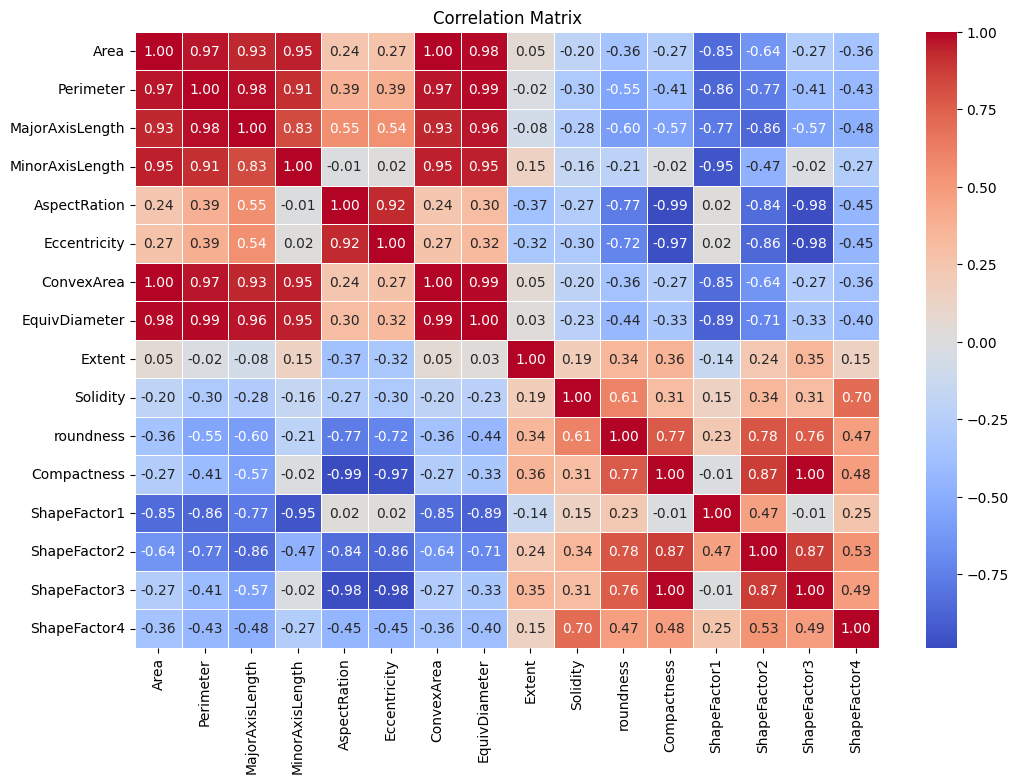

In [6]:
# Correlation between the features

# Selecting numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Conclusions: -

# 1. There is a positive correlation between Area, Perimeter, MajorAxisLength, EquivDiameter and ConvexArea indicating that they have influence over each other (i.e. They increase or decrease together)
# 2. ShapeFactor1 has a negative correlation between Area, Perimeter, ConvexArea and EquivDiameter
# 3. ShapeFactor2 has negative correlation between MajorAxisLength, AspectRation, Eccentricity and has positive correlation with Compactness
# 4. ShapeFactor3 has a negative correlation between AspectRation and Eccentricity

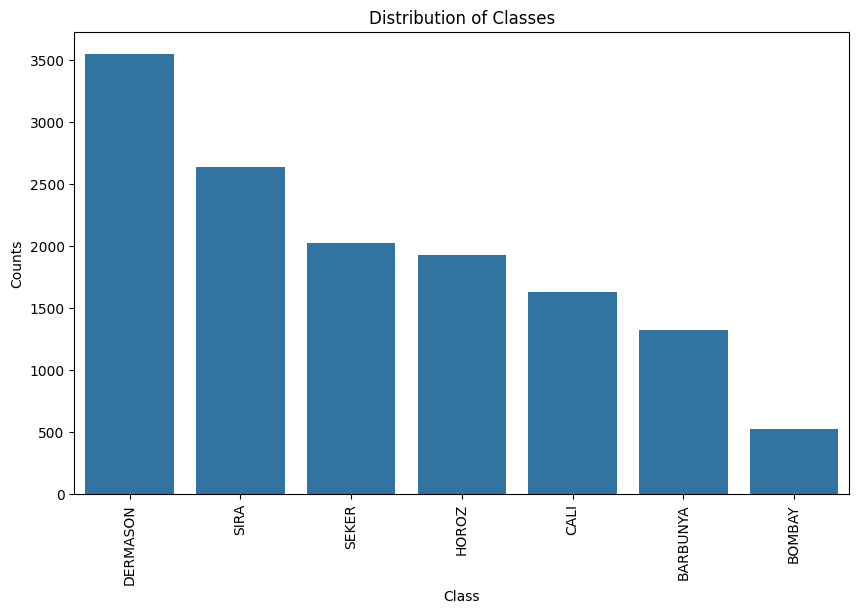

In [10]:
# Getting value counts of the 'Class' column
class_counts = df['Class'].value_counts()

# Creating a new DataFrame for the plot
plot_df = pd.DataFrame({'Class': class_counts.index, 'Counts': class_counts.values})

# Plotting the figure
plt.figure(figsize=(10, 6))
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Counts")
sns.barplot(data=plot_df, x='Class', y='Counts')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Conclusion: -

# Class Dermason is highly distributed

In [12]:
# Descriptive statistics of the variables

# Calculate descriptive statistics for all variables
all_variables = df.describe(include='all')

# Display the descriptive statistics for all variables
print(all_variables)

                 Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count    13611.000000  13611.000000     13611.000000     12577.000000   
unique            NaN           NaN              NaN              NaN   
top               NaN           NaN              NaN              NaN   
freq              NaN           NaN              NaN              NaN   
mean     53048.284549    855.283459       320.141867       202.295543   
std      29324.095717    214.289696        85.694186        45.044880   
min      20420.000000    524.736000       183.601165       122.512653   
25%      36328.000000    703.523500       253.303633       175.755083   
50%      44652.000000    794.941000       296.883367       192.426897   
75%      61332.000000    977.213000       376.495012       217.081036   
max     254616.000000   1985.370000       738.860153       460.198497   

        AspectRation  Eccentricity     ConvexArea  EquivDiameter  \
count   13611.000000  13611.000000   12808.000000   136

##6. Missing Value Treatment

In [13]:
# Seeing if missing values are present in our dataset
missing_values = df.isna().sum()
print(missing_values)

Area                  0
Perimeter             0
MajorAxisLength       0
MinorAxisLength    1034
AspectRation          0
Eccentricity          0
ConvexArea          803
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness        1388
ShapeFactor1        531
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4       1048
Class                 0
dtype: int64


In [14]:
# Missing Values are present in our dataset.

In [15]:
# Imputing missing values
df.MinorAxisLength = df.MinorAxisLength.fillna(df.MinorAxisLength.median())
df.ConvexArea = df.ConvexArea.fillna(df.ConvexArea.median())
df.Compactness = df.Compactness.fillna(df.Compactness.median())
df.ShapeFactor1 = df.ShapeFactor1.fillna(df.ShapeFactor1.median())
df.ShapeFactor4 = df.ShapeFactor4.fillna(df.ShapeFactor4.median())

In [16]:
# Checking if Missing Values are handled accordingly

missing_values = df.isna().sum()
print(missing_values)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


##7. Outlier Treatment

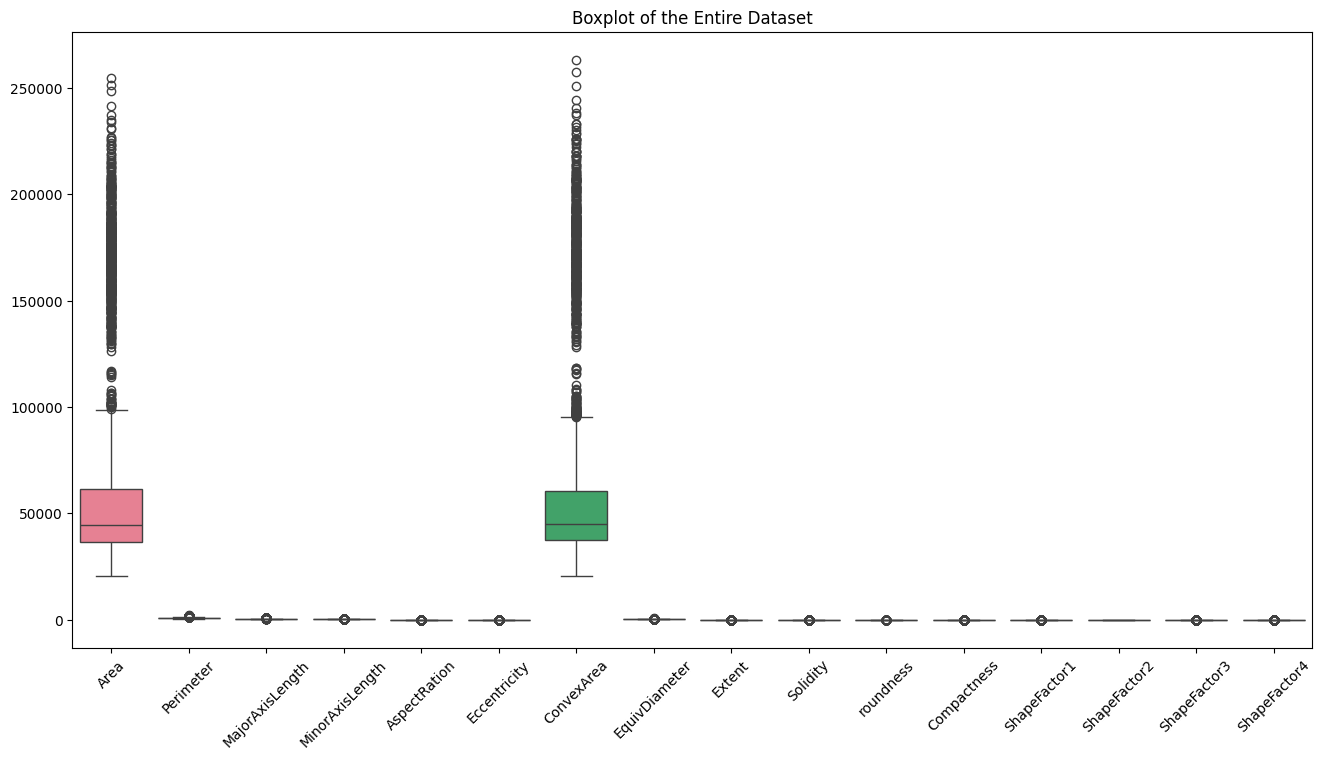

In [17]:
# Handling Outliers

# Boxplot for the entire dataset
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, orient='v')  # 'orient' specifies the orientation, 'v' for vertical
plt.title('Boxplot of the Entire Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [18]:
# Area and ConvexArea has outliers

In [19]:
# Calculating Q1, Q3, and IQR for each numerical column
Q1 = df[numerical_cols.columns].quantile(0.25)
Q3 = df[numerical_cols.columns].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier threshold
threshold = 1.5

# Identifing outliers using the IQR method
outliers = df[((df[numerical_cols.columns] < (Q1 - threshold * IQR)) |
                      (df[numerical_cols.columns] > (Q3 + threshold * IQR))).any(axis=1)]

# Removing outliers from the DataFrame
df = df.drop(outliers.index, axis=0)

In [20]:
# We have removed outliers using the above code (We have not removed much of data, since too much removal, may lead to loss of information)

In [21]:
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
23,31637,656.711,229.719255,175.510446,1.308864,0.645191,45106.0,200.702465,0.761823,0.987268,0.921842,0.873686,0.007261,0.002610,0.763327,0.999091,SEKER
24,31675,657.431,236.752632,171.210559,1.382816,0.690678,32009.0,200.822963,0.740936,0.989565,0.920929,0.801003,0.007474,0.002387,0.719510,0.994950,SEKER
29,31811,642.092,223.984683,180.917123,1.238051,0.589565,32052.0,201.253629,0.773877,0.992481,0.969600,0.898515,0.007041,0.002831,0.807329,0.999515,SEKER


##8. Model Building and Evaluation Metrics

In [22]:
# Split the data into training and testing sets.

x = df.drop(['Class'],axis = 1)

# Label encoding the dependent variable
df['Class'] = df['Class'].map({'DERMASON': 1, 'SIRA': 2, 'SEKER':3,'HOROZ':4,'CALI':5,'BARBUNYA':6,'BOMBAY':7})

y = df.Class

In [23]:
# Scaling and Train Test splitting

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns = num.columns)
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 42)

In [24]:
# Note: - This is Multi-Classification Problem and thus F1-Score is taken as Evaluation Metric
# F1 score nearer to 0 is considered as lower performance, and nearer to 1 is considered as a better model

In [25]:
# 1. Logistic Regression Model with L2 Regularization (Ridge Regularization)

def ridge(df, train_x, train_y, test_x, test_y):
    alpha = 1
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(train_x, train_y)
    ridge_test = ridge_model.predict(test_x)

    # Converting predicted values to classes (Being a Classification Problem)
    threshold = 0.5  # Defining a threshold to convert predicted probabilities into classes
    ridge_test_classes = (ridge_test > threshold).astype(int)

    # Calculating F1 score for the test set
    f1_test = f1_score(test_y, ridge_test_classes, average='weighted')

    return f1_test.round(4)

# Usage of the function:
f1_score_test = ridge(df, train_x, train_y, test_x, test_y)

print("F1 score for Logistic Regression:", f1_score_test)

F1 score for Logistic Regression: 0.1515


In [26]:
# Logistic Model is here considered as the base model for further evaluation

In [27]:
# 2. Random Forest (A Bagging Model)

def random_forest(train_x, train_y, test_x, test_y):
    # Creating a Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Training the Random Forest classifier
    rf_classifier.fit(train_x, train_y)

    # Predicting on the test set
    rf_test = rf_classifier.predict(test_x)

    # Calculating F1 score for the test set
    f1_test = f1_score(test_y, rf_test, average='weighted')

    return f1_test.round(4)

f1_score_rf_test = random_forest(train_x, train_y, test_x, test_y)
print("F1 score for Random Forest:", f1_score_rf_test)

F1 score for Random Forest: 0.9122


In [28]:
# 3. AdaBoost (A Boosting Model)

def adaboost(train_x, train_y, test_x, test_y):
    # Creating an AdaBoost classifier
    ada_classifier = AdaBoostClassifier(random_state=42)

    # Training the AdaBoost classifier
    ada_classifier.fit(train_x, train_y)

    # Predicting on the test set
    ada_test = ada_classifier.predict(test_x)

    # Calculating F1 score for the test set
    f1_test = f1_score(test_y, ada_test, average='weighted')

    return f1_test.round(4)

f1_score_ada_test = adaboost(train_x, train_y, test_x, test_y)
print("F1 score for AdaBoost:", f1_score_ada_test)

F1 score for AdaBoost: 0.6396


##9. Model Stacking

In [29]:
# Stacking of Multiple Models to Improve Performance

# Defining the base models

base_models = [
    ('LogisticRidge', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)),  # Logistic Regression with Ridge
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Initializing the stacking classifier with a meta-learner (LogisticRegression in this case)
stack_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Training the stacking model
stack_model.fit(train_x, train_y)

# Making predictions on the test set using the stacked model
stack_pred = stack_model.predict(test_x)

# Calculating F1 score for the stacked model
f1_stacked = f1_score(test_y, stack_pred, average='weighted')
print("F1 score for the Stacked model:", round(f1_stacked,4))

F1 score for the Stacked model: 0.9189


In [30]:
# In scikit-learn, for logistic regression with Ridge regularization, we need to use LogisticRegression itself by specifying the regularization penalty (penalty='l2')

In [31]:
# Conclusion from the Stacked Model:

# We have obtained:
# F-1 score on Logistic Regression as 0.1518
# F-1 score on Random Forest as 0.9123
# F-1 score on AdaBoost as 0.6254

# F-1 score on Stacked Model is 0.9177, clearly indicating that the model is performing well

##10. Hyper-Parameter Tuning

In [32]:
# 1. Hyper-Parameter Tuning - Logistic Regression Model with L2 Regularization (Ridge Regularization)

# Defining the hyperparameter grid for Ridge regression
param_grid_ridge = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Different solvers

}

# Creating a Ridge regression model
ridge_model = Ridge()

# Randomized search with cross-validation
random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_grid_ridge,
                                         n_iter=10, cv=3, random_state=42, n_jobs=-1)


# Fitting the random search to the data
random_search_ridge.fit(train_x, train_y)

# Getting the best parameters
best_params_ridge = random_search_ridge.best_params_

# Printing the best hyperparameters
print("Best Hyperparameters for Ridge Regression:", best_params_ridge)

# Creating a Ridge model with the best parameters
best_ridge_model = Ridge(**best_params_ridge)

# Training the model with the best parameters
best_ridge_model.fit(train_x, train_y)

# Making predictions on the test set using the best model
predictions_ridge = best_ridge_model.predict(test_x)

# Calculating F1 score for the tuned Ridge model
f1_tuned_ridge = f1_score(test_y, predictions_ridge.round(), average='weighted')
print("F1 score for Tuned Ridge Regression:", round(f1_tuned_ridge,4))

Best Hyperparameters for Ridge Regression: {'solver': 'auto', 'alpha': 0.1}
F1 score for Tuned Ridge Regression: 0.6435


In [33]:
# Conclusion:

# For Previous Logistic Regression with L2 Regularization Model F1 score was 0.1515
# For the Hyper-Parameter Tuned Model, F1 score is 0.6435
# Clearly, we could see the improvement in the performance

In [34]:
# 2. Hyper-Parameter Tuning - Random Forest (A Bagging Model)

param_dist = {
        'n_estimators': np.arange(100, 201, 10),
        'max_depth': [None] + list(np.arange(10, 21, 2)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
        }

# RandomForest base model
rf_model = RandomForestClassifier(random_state=42)

# Randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                  n_iter=50, cv=5, scoring='f1_weighted', n_jobs=-1, random_state=42)

# Fitting randomized search to the data
random_search.fit(train_x, train_y)

# Getting best parameters
best_params = random_search.best_params_
print("Best Hyperparameters for RandomForest:", best_params)

# Using RandomizedSearchCV best parameters
n_est_rf = best_params['n_estimators']
max_dep_rf = best_params['max_depth']
best_rf_model = RandomForestClassifier(n_estimators=n_est_rf, max_depth=max_dep_rf, random_state=42)

# Training model with best parameters
best_rf_model.fit(train_x, train_y)

# Making predictions on the test set using the tuned model
predictions_tuned = best_rf_model.predict(test_x)

# Calculating F1 score for the tuned model
f1_score_rf_test_tuned = f1_score(test_y, predictions_tuned, average='weighted')
print("F1 score for Tuned Random Forest:", round(f1_score_rf_test_tuned, 4))

Best Hyperparameters for RandomForest: {'n_estimators': 130, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 18, 'bootstrap': True}
F1 score for Tuned Random Forest: 0.9137


In [35]:
# Conclusion:

# For Previous Random Forest Model F1 score was 0.9122
# For the Hyper-Parameter Tuned Model, F1 score is 0.9137
# Clearly, we could see the improvement in the performance

In [36]:
# 3. Hyper-Parameter Tuning - AdaBoost (A Boosting Model)

# Defining the parameter grid for AdaBoostClassifier
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0]     # Learning rate
}

# Creating an AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=42)

# Randomized search with cross-validation
random_search_ada = RandomizedSearchCV(estimator=ada_model, param_distributions=param_grid_ada,
                                       n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fitting the random search to the data
random_search_ada.fit(train_x, train_y)

# Getting the best parameters
best_params_ada = random_search_ada.best_params_

# Creating an AdaBoostClassifier with the best parameters
best_ada_model = AdaBoostClassifier(**best_params_ada, random_state=42)

# Training the model with the best parameters
best_ada_model.fit(train_x, train_y)

# Making predictions on the test set using the best model
predictions_ada = best_ada_model.predict(test_x)

# Calculating F1 score for the tuned AdaBoostClassifier model
f1_tuned_ada = f1_score(test_y, predictions_ada, average='weighted')

print("Best Hyperparameters for AdaBoost:", best_params_ada)
print("F1 score for Tuned AdaBoostClassifier:",round(f1_tuned_ada,4))

Best Hyperparameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.01}
F1 score for Tuned AdaBoostClassifier: 0.6747


In [37]:
# Conclusion:

# For Previous AdaBoost Model F1 score was 0.6396
# For the Hyper-Parameter Tuned Model, F1 score is 0.6747
# Clearly, we could see the improvement in the performance

##11. Stacked Model with the best Tuned Parameters

In [38]:
# Creating a stack of models
estimators = [
    ('ridge', best_ridge_model),
    ('random_forest', best_rf_model),
    ('adaboost', best_ada_model)
]

# Stacking classifier using Logistic Regression as the final estimator
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fitting the stacked model on the training data
stacked_model.fit(train_x, train_y)

# Making predictions on the test set using the stacked model
predictions_stacked = stacked_model.predict(test_x)

# Calculating F1 score for the stacked model
f1_stacked = f1_score(test_y, predictions_stacked, average='weighted')
print("F1 score for Stacked Model:", round(f1_stacked, 4))

F1 score for Stacked Model: 0.9147


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# Conclusion: -

# The stacked model with hyper-parameter tuned has the higher F1 score, indicating the better performance

##12. Analyzing Feature Importance of Different Models

<ipython-input-40-5944aa9cc537>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logistic_regression_feature_importance.values, y=logistic_regression_feature_importance.index, palette='viridis')
<ipython-input-40-5944aa9cc537>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=random_forest_feature_importance.values, y=random_forest_feature_importance.index, palette='viridis')
<ipython-input-40-5944aa9cc537>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ada_feature_importance.values, y=ada_feature_importance.index, palette='viridis

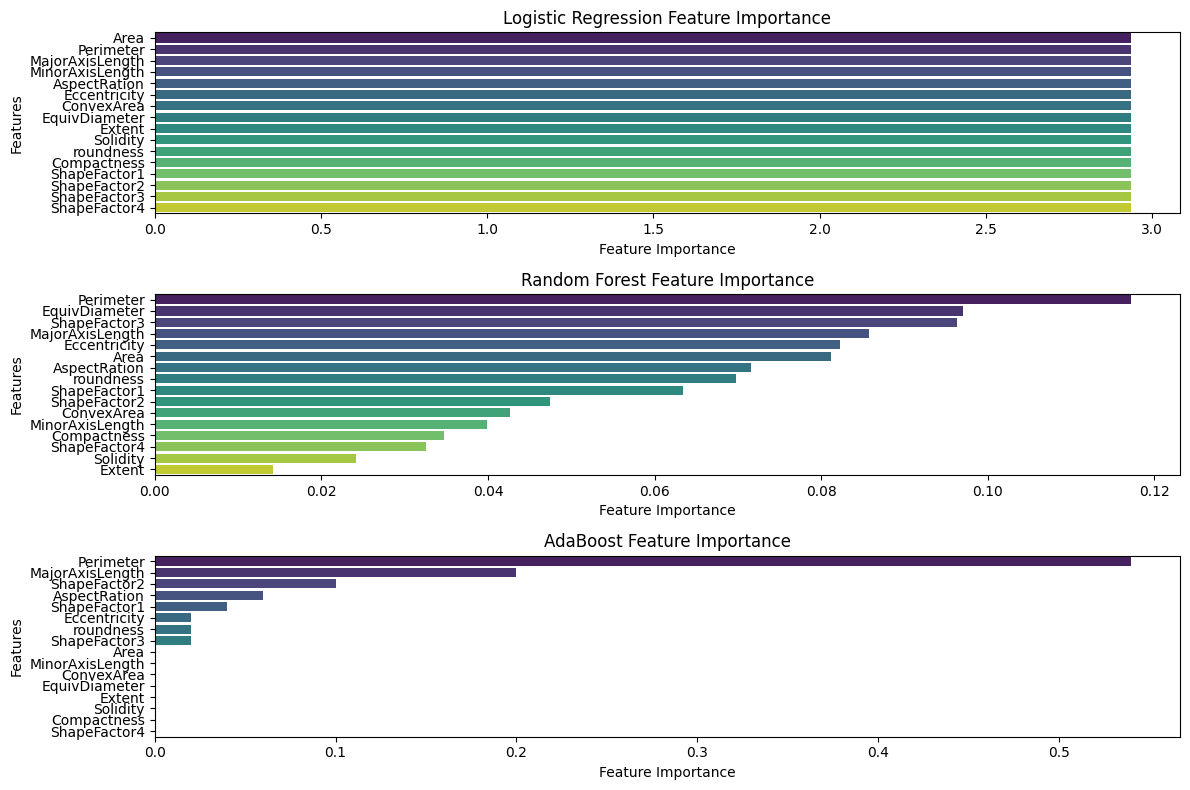

In [40]:
# Analyzing Feature Importance of Different Models to gain insights about which features are most important for predicting the type of bean

# Logistic Regression Feature Importance
logistic_regression_coefficients = best_ridge_model.coef_[0]
logistic_regression_feature_importance = pd.Series(logistic_regression_coefficients, index=train_x.columns)
logistic_regression_feature_importance = logistic_regression_feature_importance.abs().sort_values(ascending=False)

# Random Forest Feature Importance
random_forest_feature_importance = best_rf_model.feature_importances_
random_forest_feature_importance = pd.Series(random_forest_feature_importance, index=train_x.columns)
random_forest_feature_importance = random_forest_feature_importance.sort_values(ascending=False)

# AdaBoost Feature Importance
ada_feature_importance = best_ada_model.feature_importances_
ada_feature_importance = pd.Series(ada_feature_importance, index=train_x.columns)
ada_feature_importance = ada_feature_importance.sort_values(ascending=False)

# Plotting Feature Importance for each model
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.barplot(x=logistic_regression_feature_importance.values, y=logistic_regression_feature_importance.index, palette='viridis')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.subplot(3, 1, 2)
sns.barplot(x=random_forest_feature_importance.values, y=random_forest_feature_importance.index, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.subplot(3, 1, 3)
sns.barplot(x=ada_feature_importance.values, y=ada_feature_importance.index, palette='viridis')
plt.title('AdaBoost Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

In [41]:
# Final Conclusions:

# Perimeter is an important feature for Random Forest and AdaBoost Model
# ShapeFactor3 is an next important feature for Random Forest and MajorAxisLength is an second important feature for AdaBoost
# Features are highly correlated with the Target Variable in Logistic Regression Model
# Random Forest Model performs better when compared to other models (Due to it's ensemble learning capability)

##In this Project, we have worked on a multi-classification problem of Dry Bean Classification and built machine learning models, implemented techniques to improve the model performance.